<a href="https://colab.research.google.com/github/thiagonishimura/Mestrado_Fundamentos_IC/blob/main/Thiago_Atividade_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Atividade 4**

**Programas em Python for p-value, confidence intervals e correlation**

# **Parte A - Correlação**

**Enunciado**

- Faça plotes similares as duas figuras mostradas.

- Cada uma deve ter 9 pontos. A segunda deve ter seus dados gerados aleatoriamente com uma distribuição uniforme no mesmo intervalo da primeira.

- Use a função linregress para achar um reta que represente os dados e também para calcular o p-value. Interprete os resultados. Pesquise sobre a função linregress.

- Calcule a covariância e interprete os resultados.


**Figura 1:**

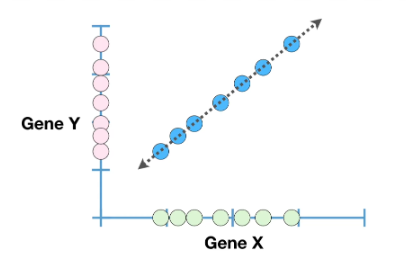

**Figura 2:**

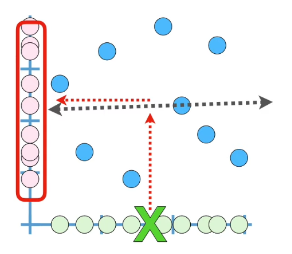

In [ ]:
# Importação das bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from numpy import cov

In [ ]:
np.random.seed(42)

# Conjunto 1: Correlação positiva (linear)
x1 = np.arange (1,10)
y1 = 2 * x1 + np.random.normal(0, 2, size=len(x1))  # adiciona ruído

# Conjunto 2: Dados aleatórios uniformes no mesmo intervalo
x2 = np.arange(1, 10)
y2 = np.random.uniform(min(y1), max(y1), size=len(x2))

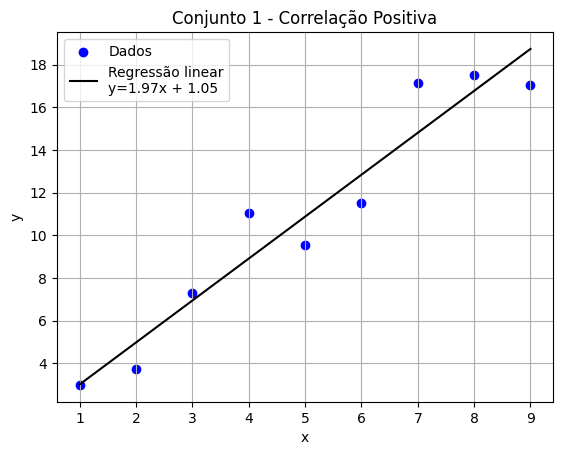

Resultados: Conjunto 1 - Correlação Positiva
Coeficiente angular (a): 1.97
Coeficiente linear (b): 1.05
Coeficiente de correlação (r): 0.96
p-value: 0.0000
Erro padrão: 0.21
Covariância: 14.74
--------------------------------------------------


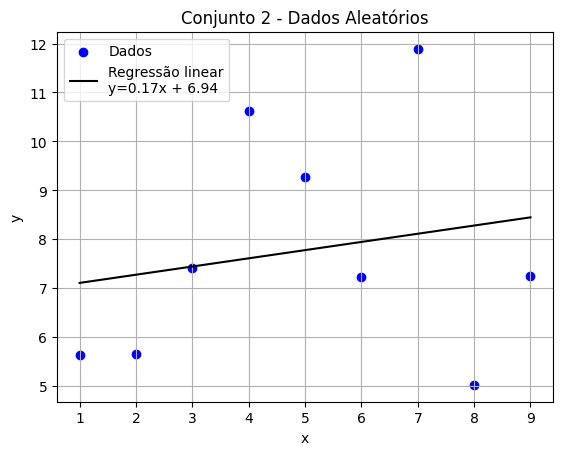

Resultados: Conjunto 2 - Dados Aleatórios
Coeficiente angular (a): 0.17
Coeficiente linear (b): 6.94
Coeficiente de correlação (r): 0.19
p-value: 0.6165
Erro padrão: 0.32
Covariância: 1.26
--------------------------------------------------


In [ ]:
# Função para calcular e exibir resultados
def analisar_conjunto(x, y, titulo, cor):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    linha = slope * x + intercept # ax + b (função da reta)
    covariancia = cov(x, y)[0, 1] # Utilizando [0,1] pois queremos a covariância entre x e y. (matriz 2x2)

    plt.scatter(x, y, color=cor, label='Dados')
    plt.plot(x, linha, color='black', label=f'Regressão linear\ny={slope:.2f}x + {intercept:.2f}')
    plt.title(f'{titulo}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()
    plt.show()

    print(f'Resultados: {titulo}')
    print(f'Coeficiente angular (a): {slope:.2f}')
    print(f'Coeficiente linear (b): {intercept:.2f}')
    print(f'Coeficiente de correlação (r): {r_value:.2f}')
    print(f'p-value: {p_value:.4f}')
    print(f'Erro padrão: {std_err:.2f}')
    print(f'Covariância: {covariancia:.2f}')
    print('-' * 50)

# Análise do Conjunto 1
analisar_conjunto(x1, y1, 'Conjunto 1 - Correlação Positiva', 'blue')

# Análise do Conjunto 2
analisar_conjunto(x2, y2, 'Conjunto 2 - Dados Aleatórios', 'blue')


**Discussão**

***Conjunto 1:*** Analisando o resultado do conjunto 1, podemos perceber que **há uma grande correlação linear positiva entre as features**, pois o valor obtido de **r=0.96** é muito próximo de 1. O valor do p-value foi extremamente abaixo de 0.05 (5%), indicando que **a correlação é estatísticamente significativa**, reforçado pela valor elevado da covariância de 14.74.

***Conjunto 2:*** Já o conjunto 2, que foi gerado de forma aleatória, demonstra que **não há uma correlação significativa entre as features**, já que o resultado obtido foi **r=0.19**, sendo um valor muito próximo à 0 (zero). O p-value obtido foi de 0.6165 (aproximadamente 62%), valor esse muito levado e muito acima dos 5%, o qual no permite rejeitar a hipótese nula, reforçado ainda pelo baixo valor obtido pela **covariância, que foi de 1.26.**

A análise demonstrou que há uma diferença clara entre dados gerados com uma correlação real e dados gerados aleatoriamente.

A utilização da função linregress da biblioteca scipy.stats, possibilita a utilização de funções estatísticas prontas para calcularmos de forma simplificada os seguintes atributos:
- .slope (coeficiente angular)
- .intercept (coeficiente linear)
- .rvalue (coeficiente de correlação de Pearson)
- .pvalue (p-value)
- .stderr (erro padrão da inclinação)
- .intercept_stderr (erro padrão do intercepto)

# **Parte B - Estimando um Intervalo de Confiança para a Média**

**Enunciado**

- Obtenha um conjunto de dados amostrais (por exemplo, pesos de indivíduos, notas de testes, etc.).

- Calcule o intervalo de confiança de 95% para a média da população seguindo os passos:
  - Calcular a média e o desvio padrão da amostra.
  - Usar a fórmula para intervalo de confiança ou a biblioteca scipy.stats.
  - Desafio: Repetir o processo para diferentes níveis de confiança (por exemplo, 90%, 99%) e comparar os resultados.

- Visualizar os intervalos de confiança em um gráfico usando matplotlib para mostrar a variabilidade.

**Obs1.:** Como o desvio padrão da população é desconhecido e o número de amostras é pequena, iremos utilizar a distribuição t em vez da z.

**Obs2.:** Para fins didáticos de aprendizado, decidi realizar o cálculo de forma manual, ao invés de utilizar a biblioteca scipy.stats

**Fórmula do Intervalo de Confiança (CI)**

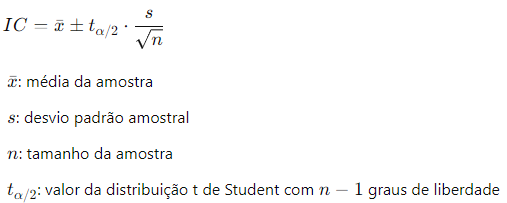

Para a realização dessa parte da atividade, iremos utilizar dados fictícios utilizando o peso (em kg) de 20 individuos.

In [2]:
# Importação das bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

In [3]:
# Conjunto de dados amostrais: pesos (em kg) de 20 pessoas
pesos = np.array([65.80, 70.15, 68.35, 72.00, 66, 69.87, 74.85, 67.45, 71, 68, 66.50, 73.55, 69, 70.20, 67, 75.30, 72.00, 68.80, 70.90, 69.45])

In [4]:
# Definindo as variáveis para realizar o cálculo
media_amostra = np.mean(pesos)
confianca1 = 0.90
confianca2 = 0.95
confianca3 = 0.99
dp_amostral = np.std(pesos, ddof=1)
n = len(pesos)

In [5]:
# Função para calcular intervalo de confiança manualmente
def calcular_ic(x_linha, s, n, z):
    alpha = 1 - z
    t_critico = t.ppf(1 - alpha/2, df=n-1) # Utilizando a função da biblioteca scipy.stats pela facilidade de uso da tabela t-student
    erro_margem_ic = t_critico * (s / np.sqrt(n))
    return x_linha - erro_margem_ic, x_linha + erro_margem_ic

# Alternativa com scipy.stats
# from scipy.stats import t
# intervalo = t.interval(confidence=0.95, df=n-1, loc=media, scale=desvio_amostral/np.sqrt(n))

In [6]:
# Cálculo dos ICs
ic_90 = calcular_ic(media_amostra, dp_amostral, n, confianca1)
ic_95 = calcular_ic(media_amostra, dp_amostral, n, confianca2)
ic_99 = calcular_ic(media_amostra, dp_amostral, n, confianca3)

# Exibir resultados
print(f'Média amostral: {media_amostra:.2f} kg')
print(f'Desvio padrão amostral: {dp_amostral:.2f} kg')
print(f'Intervalo de confiança 90%: ({ic_90[0]:.2f}, {ic_90[1]:.2f})')
print(f'Intervalo de confiança 95%: ({ic_95[0]:.2f}, {ic_95[1]:.2f})')
print(f'Intervalo de confiança 99%: ({ic_99[0]:.2f}, {ic_99[1]:.2f})')

Média amostral: 69.81 kg
Desvio padrão amostral: 2.76 kg
Intervalo de confiança 90%: (68.74, 70.87)
Intervalo de confiança 95%: (68.52, 71.10)
Intervalo de confiança 99%: (68.05, 71.57)


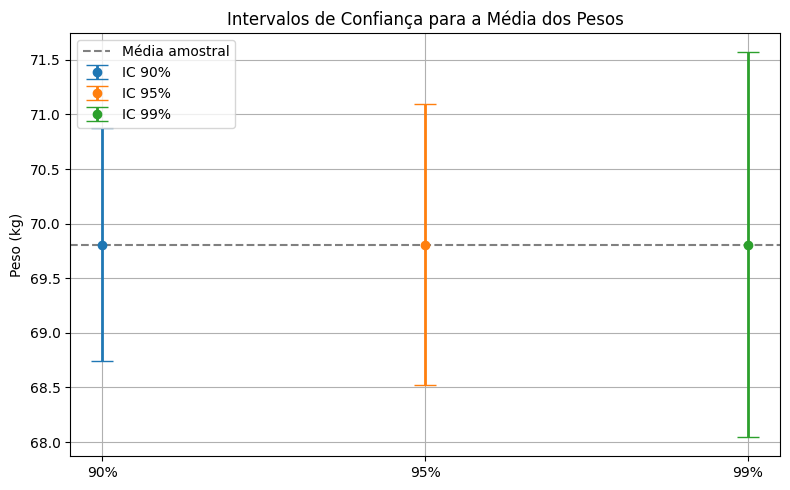

In [7]:
# Visualização gráfica
confiancas = ['90%', '95%', '99%']
ics = [ic_90, ic_95, ic_99]

plt.figure(figsize=(8, 5))
for i, (label, intervalo) in enumerate(zip(confiancas, ics)):
    plt.errorbar(x=i, y=media_amostra,
                 yerr=[[media_amostra - intervalo[0]], [intervalo[1] - media_amostra]],
                 fmt='o', capsize=8, label=f'IC {label}', lw=2)

plt.xticks(ticks=range(3), labels=confiancas)
plt.axhline(media_amostra, color='gray', linestyle='--', label='Média amostral')
plt.title('Intervalos de Confiança para a Média dos Pesos')
plt.ylabel('Peso (kg)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Discussão**

O **intervalo de confiança de 95%** indica que, com 95% de confiança, **a média real da população está entre 68.74kg e 70.87kg**.
Podemos perceber também, que a largura do intervalo aumenta à medida que o nível de confiança cresce, pois quanto maior o nível de confiança, maior é a margem necessária para garantir que a média populacional esteja dentro do intervalo.

O gráfico gerado representa de forma clara essa afirmação, pois o intervalo de 90% é o mais estreito, quanto o de 99% é o mais amplo, e todos centrado na média amostral de 69.81kg.

# **Parte C - p-value em um Teste de Hipótese**

**Enunciado**

- Forneça dois conjuntos de dados: um para um grupo de controle e outro para um grupo de teste.
- Formule a hipótese nula.
- Realizar um teste t de duas amostras usando scipy.stats.ttest_ind.

Interpretar o p-value resultante e decidir se rejeitam a hipótese nula em um nível de significância dado (por exemplo, 0,05).


**Dados para a realização dessa parte da atividade:**

Foram utilizados dois conjuntos de dados com 10 observações cada:
- Grupo controle: notas de indivíduos antes de uma intervenção.
- Grupo teste: notas dos mesmos indivíduos ou de um grupo equivalente após aplicação de um novo método

- Hipótese nula (H0): As médias dos grupos são iguais
- Hipótese alternativa (H1): As médias dos grupos são diferentes.

In [8]:
# Importação das bibliotecas
import numpy as np
from scipy.stats import ttest_ind

In [20]:
# Conjunto de dados fictícios
controle = np.array([70, 72, 68, 71, 69, 74, 73, 70, 68, 72])
teste    = np.array([79, 81, 80, 68, 69, 79, 82, 75, 78, 83])

In [21]:
# Teste t para duas amostras independentes
estatistica_t, p_value = ttest_ind(teste, controle, equal_var=False) # Teste de Welch para variâncias diferentes (equal_var=False)

# Exibir resultados
print(f'Estatística t: {estatistica_t:.3f}')
print(f'p-value: {p_value:.4f}')

Estatística t: 3.795
p-value: 0.0026


In [22]:
# Decisão com base em alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos H0: há diferença significativa entre os grupos.")
else:
    print("Não rejeitamos H0: não há evidência suficiente de diferença entre os grupos.")

Rejeitamos H0: há diferença significativa entre os grupos.


**Discussão**

O valor do **p-value=0.0026** é menor que o nível de significância de 0,05 (5%), indicando que a diferença observada entre as médias dos dois grupos dificilmente seria atribuída ao acaso.

**Rejeita-se a hipótese nula**, pois há evidência estatística suficiente para afirmar que as médias dos grupos são significativamente diferentes.



# **Parte D - Significance Level**

**Enunciado**

Faça slides explicando o código abaixo e interpretando os resultados.
- Teste com dois valores para significance_level
- Pelo menos quatro slides com a explicação e interpretação.

In [28]:
import numpy as np
from scipy.stats import ttest_ind

num_simulations = 10000
sample_size = 30
true_mean = 50
true_std = 10
significance_level = 0.05 #Usar valores diferentes 0.05 e 0.07
significant_results = 0

for _ in range(num_simulations):
    group1 = np.random.normal(true_mean, true_std, sample_size)
    group2 = np.random.normal(true_mean, true_std, sample_size)
    t_stat, p_value = ttest_ind(group1, group2)

    if p_value < significance_level:
        significant_results += 1

proportion_significant = significant_results / num_simulations

print(f"Number of simulations: {num_simulations}")
print(f"Significance level (alpha): {significance_level}")
print(f"Proportion of significant results (Type I error rate): {proportion_significant:.4f}")

Number of simulations: 10000
Significance level (alpha): 0.05
Proportion of significant results (Type I error rate): 0.0510


# **Parte E - Reproduzindo slides em código**

Reproduza em Python o conteúdo dos slides de 24 a 46.
- slides da apresentação: **What are confidence intervals?.pptx**